In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, load_digits, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Tutorial `sklearn`

## Digits

In [39]:
digits = load_digits()
digits_data = digits.data
digits_target = digits.target
digits_images = digits.images
digits_data.shape, digits_target.shape, digits_images.shape

((1797, 64), (1797,), (1797, 8, 8))

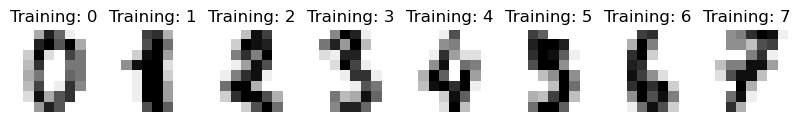

In [53]:
_, axes = plt.subplots(nrows=1, ncols=8, figsize=(10,3))
for ax, image, label in zip(axes, digits_images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Training: {label}")

In [64]:
digits_data_train, digits_data_test,\
digits_target_train, digits_target_test, \
= train_test_split(digits_data, digits_target, train_size=0.7)

digits_data_train.shape, digits_target_train.shape, digits_data_test.shape, digits_target_test.shape,

((1257, 64), (1257,), (540, 64), (540,))

In [65]:
classifier = SVC(gamma=0.001, C=100)
classifier.fit(digits_data_train, digits_target_train)

SVC(C=100, gamma=0.001)

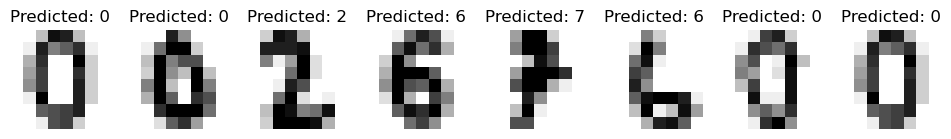

In [75]:
random_indeces = np.random.randint(0, len(digits_data_test), 8)
images = digits_data_test[random_indeces].reshape((8, 8, -1))
predicted_labels = digits_target_test[random_indeces]

_, axes = plt.subplots(nrows=1, ncols=8, figsize=(12,3))
for ax, image, label in zip(axes, images, predicted_labels):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r)
    ax.set_title(f"Predicted: {label}")

In [77]:
predicted = classifier.predict(digits_data_test)

print(
    f"Classification report for classifier {classifier}:\n"
    f"{classification_report(digits_target_test, predicted)}\n"
)

Classification report for classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        43
           2       1.00      1.00      1.00        62
           3       1.00      0.98      0.99        56
           4       1.00      1.00      1.00        52
           5       0.96      0.98      0.97        55
           6       1.00      1.00      1.00        53
           7       0.96      1.00      0.98        49
           8       1.00      1.00      1.00        54
           9       0.98      0.95      0.96        58

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540




In [82]:
classifier.class_weight_

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [84]:
classifier.fit_status_

0

In [85]:
classifier.intercept_

array([-0.45268314, -0.3834493 , -0.356052  , -0.41676026, -0.46593837,
       -0.22325661, -0.3929603 , -0.41593796, -0.410801  ,  0.16110218,
        0.1974439 ,  0.07021828,  0.10783742,  0.30692914,  0.06275267,
        0.17665532,  0.16931775,  0.03172165, -0.06380365, -0.02593884,
        0.22032998, -0.06765231, -0.04246854, -0.0067785 , -0.11886328,
       -0.04618159,  0.14708008, -0.1327532 , -0.03721948, -0.01483581,
        0.08250112,  0.29258877,  0.01335759,  0.06649345,  0.02178937,
        0.2456875 , -0.0327836 ,  0.02871561, -0.07390903, -0.23096559,
       -0.27017709, -0.23528266,  0.08195812,  0.04211531, -0.01969465])

In [87]:
classifier.support_vectors_.shape

(631, 64)

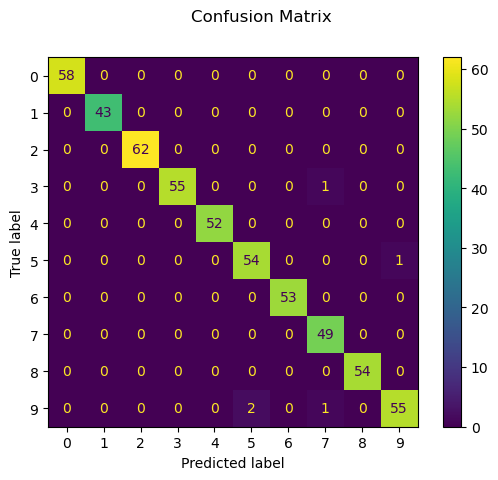

In [81]:
disp = ConfusionMatrixDisplay.from_predictions(digits_target_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

## Iris

## Diabetes